# PreLecture HW

# Instruciton 1

In [ ]:
#What is the difference between the "standard error of the mean" and the "standard deviation" of the original data?
#What distinct ideas do each of these capture? Explain this concisely in your own words.

"""
Both the standard deviation (SD) and the standard error of the mean (SEM) deal with how spread out data is.
However, they focus on different things. The standard deviation shows how much individual data points vary from 
the mean. Basically, it tells us how the dataset are all bunched up together or if they're spread out. A high SD 
means the data points are spread out all over the place, while a low SD means they're pretty close to the average 
or mean.

On the other hand, the standard error of the mean is about how much we expect our sample mean to differ from 
the actual population mean. It helps us figure out how precise our sample mean is as an estimate of the population 
mean. A smaller SEM means our sample mean is a better reflection of the true population mean, while a bigger SEM 
means there’s more uncertainty. We calculate the SEM by dividing the SD by the square root of the sample size. So, 
if we have more samples, the SEM will get smaller.

In conclusion, SD is all about how individual data points vary, while SEM is about how reliable our sample mean 
is as an estimate of the population mean.
"""

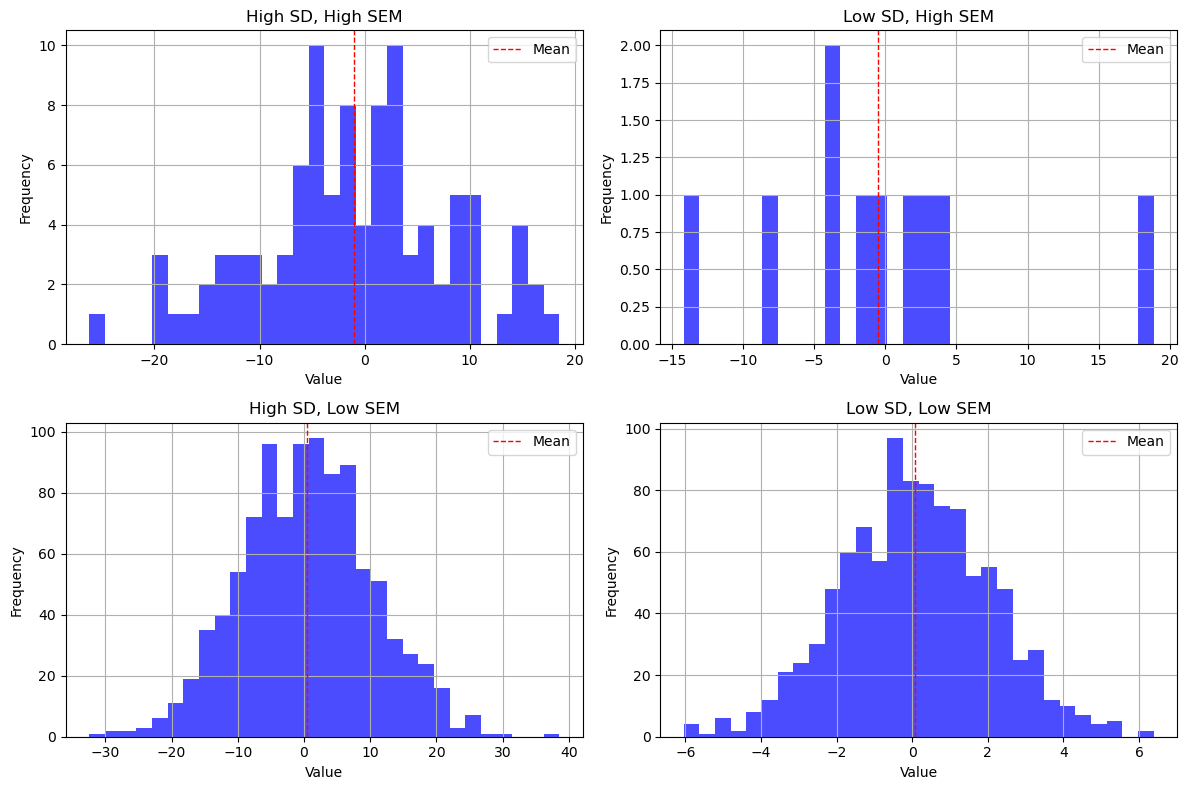

High SD, High SEM: SD = 9.08, SEM = 0.91
Low SD, High SEM: SD = 8.67, SEM = 2.74
High SD, Low SEM: SD = 9.90, SEM = 0.31
Low SD, Low SEM: SD = 1.99, SEM = 0.06


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate SEM
def calculate_sem(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

# Set random seed for reproducibility
np.random.seed(42)

# Generate datasets
data_high_sd_high_sem = np.random.normal(loc=0, scale=10, size=100)  # High SD
data_low_sd_high_sem = np.random.normal(loc=0, scale=10, size=10)  # High SEM, low sample size
data_high_sd_low_sem = np.random.normal(loc=0, scale=10, size=1000)  # High SD, large sample size
data_low_sd_low_sem = np.random.normal(loc=0, scale=2, size=1000)  # Low SD, large sample size

# Calculate SD and SEM
stats = [
    ('High SD, High SEM', data_high_sd_high_sem),
    ('Low SD, High SEM', data_low_sd_high_sem),
    ('High SD, Low SEM', data_high_sd_low_sem),
    ('Low SD, Low SEM', data_low_sd_low_sem)
]

# Plotting
plt.figure(figsize=(12, 8))

for i, (title, data) in enumerate(stats):
    plt.subplot(2, 2, i + 1)
    plt.hist(data, bins=30, alpha=0.7, color='blue')
    plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()

# Save the figure as a PNG file
plt.tight_layout()
plt.savefig('sd_sem_example.png')
plt.show()

# Print SD and SEM for each dataset
for title, data in stats:
    sd = np.std(data, ddof=1)
    sem = calculate_sem(data)
    print(f"{title}: SD = {sd:.2f}, SEM = {sem:.2f}")


In [5]:
#The graphs above are the example that ChatGPT gave for graph with varieties of SD and SEM
#Summary of the session:

"""
In this chat session, we discussed the difference between the standard deviation (SD) and the standard error of 
the mean (SEM), highlighting that:

- Standard Deviation (SD) measures the dispersion of individual data points within a dataset.
- Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean, 
influenced by the sample size.

You requested Python code to demonstrate high and low values of both SD and SEM using histograms of different 
datasets. I provided a code example that generated four histograms representing various scenarios, saved them as 
a PNG file, and calculated SD and SEM for each dataset. The code was structured to create visualizations, print 
the respective values, and display the plots.
"""

#Link chat log: https://chatgpt.com/share/66fe15c2-4638-8002-b5aa-859dd37aa788

# Instruction 2

In [ ]:
#How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? 
#Explain this concisely in your own words.

"""
In this case, we can create a 95% Confidence interval or CI by using the standard error of the mean. How? Here is 
the formula.

CI = x +- (Z x SEM)

- Z-Score: is symbol corresponds to the desired confidence level. For example, for a 95% confidence interval, 
  the Z-score is approximately 1.96, which captures the middle 95% of the normal distribution.
- x is the sample mean

Why we can calculate the Confidence Interval using the SEM? It's because SEM calculate the variability of the sample 
mean, while the Confidence Interval calculate the certainty of the estimation. Thus, SEM and Confidence Interval are related between each other.
"""

In [ ]:
#Summary ChatGPt
"""
Here’s a summary of our chat session:

1. Using SEM for Confidence Intervals:
   - Discussed how to create a 95% confidence interval using the Standard Error of the Mean (SEM) and its relationship with the Central Limit Theorem (CLT).
   - Clarified that the confidence interval calculated from bootstrapped sample means differs from one calculated using SEM.

2. Understanding SEM and Confidence Interval(CI):
   - Explained how SEM measures the variability of the sample mean, while CI indicates the percentage of confidence intervals that would contain the true population mean.
   - Highlighted the formula for confidence interval calculation and how changing the confidence interval affects the width of the interval.

3. Concise Relationship:
   - Provided a brief explanation summarizing the connection between SEM and CI, emphasizing their roles in constructing and interpreting confidence intervals.

If you have any further questions or need more clarification, feel free to ask!
"""

#Link: https://chatgpt.com/share/66fe1a9a-3d64-8002-a10c-4a1cb4ac06c4

# Instruction 3

In [ ]:
# Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without 
#using their standard deviation to estimate the standard error of the mean)? 
"""
After understanding it using ChatGPT, I would say that creating a 95% bootstrapped confidence interval is pretty 
easy. How? This is the steps:

1. Generate Bootstrapped Samples: By taking resample of the dataset and making a boostrapped data.

2. Sort the Bootstrapped Means: Once you have the distribution of bootstrapped means, sort them in ascending order.

3. Find the Percentiles: In this case, to create 95% percentile interval, we need to find both the 2.5th percentile
                         and the 97.5 percentile of the sorted boostrapped means. The value at the 2.5th percentile 
                         is the lower bound, and the value at the 97.5th percentile is the upper bound of the 
                         confidence interval.

4. It's done. This interval will contain the exact 95% of the bootstrapped means, giving you a 95% confidence 
   interval for the population mean based on your bootstrap resamples.
   
If we want to apply it by coding, we can use the same concept by making lower bound and upper bound. For example:
    lower_bound = np.quantile(boot_means, 0.025)  # 2.5th percentile
    upper_bound = np.quantile(boot_means, 0.975)  # 97.5th percentile
    
The np.quantile is used to giving a bound for the data. Thus, we can print the data with 95% confidence interval by
using this code:
    print(f"95% Bootstrapped Confidence Interval: ({lower_bound}, {upper_bound})")

"""

In [ ]:
#Summary ChatGPT session:

"""
Summary of Today’s Session

In this chat, we discussed how to create a 95% bootstrapped confidence interval without using the standard error 
of the mean. The percentile method was suggested, which involves generating many bootstrapped sample means, 
sorting them, and finding the 2.5th and 97.5th percentiles to create the interval.

You also asked about using np.quantile() as an alternative to np.percentile(). We clarified that both functions
are equivalent in functionality, but the key difference is that np.percentile() takes values between 0 and 100,
while np.quantile() uses decimal values between 0 and 1 to represent the same percentiles.
"""

#LINK CHATGPT LOG HISTORY:
#https://chatgpt.com/share/66fedf4c-3100-8002-8fa2-9b7c1508f439

# Instruction 4

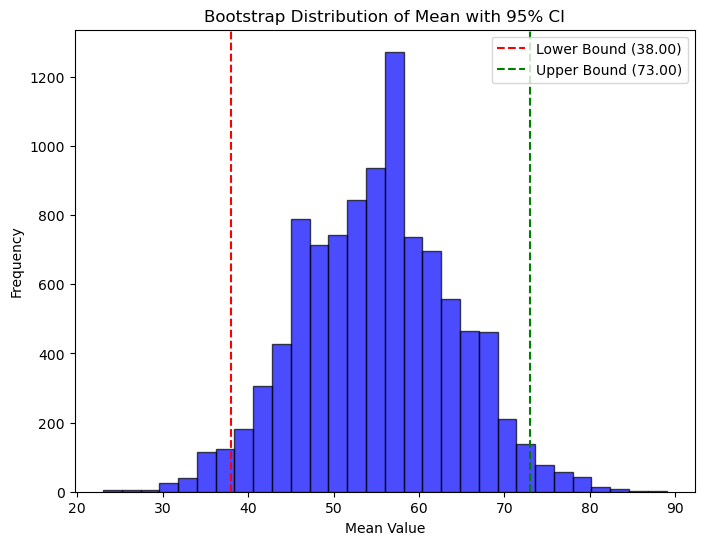

95% Bootstrap Confidence Interval for Mean: (38.0, 73.0)


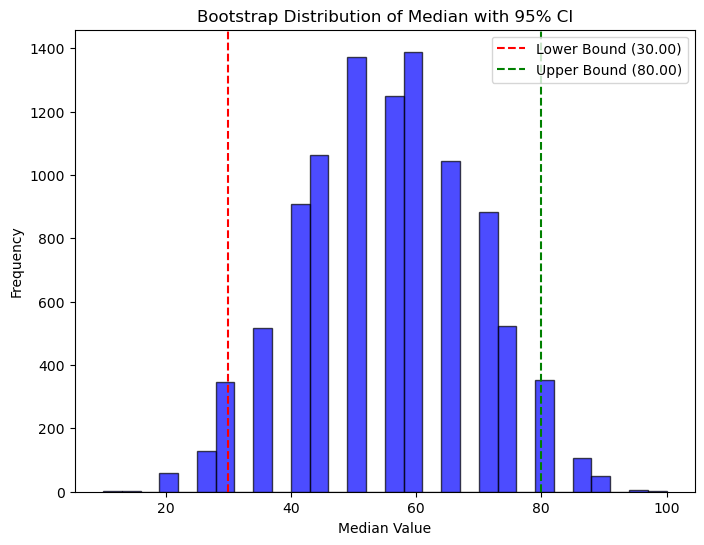

95% Bootstrap Confidence Interval for Median: (30.0, 80.0)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (you can replace this with your actual sample)
sample = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Number of bootstrap samples
n_bootstraps = 10000

# Function to calculate bootstrap confidence interval for any statistic and plot results
def bootstrap_ci_with_plot(sample, stat_func, n_bootstraps=10000, ci=95):
    bootstrapped_stats = []
    n = len(sample)
    
    # Generate bootstrap samples
    for _ in range(n_bootstraps):
        # Randomly sample with replacement from the original data
        bootstrap_sample = np.random.choice(sample, size=n, replace=True)
        
        # Calculate the statistic on the bootstrap sample
        bootstrapped_stats.append(stat_func(bootstrap_sample))
    
    # Compute the confidence interval
    lower_bound = np.percentile(bootstrapped_stats, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrapped_stats, ci + (100 - ci) / 2)
    
    # Plot the bootstrapped statistics
    plt.figure(figsize=(8, 6))
    plt.hist(bootstrapped_stats, bins=30, alpha=0.7, color='b', edgecolor='black')
    
    # Highlight the confidence interval
    plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
    plt.title(f'Bootstrap Distribution of {stat_func.__name__.capitalize()} with 95% CI')
    plt.xlabel(f'{stat_func.__name__.capitalize()} Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Show the plot
    plt.show()
    
    return lower_bound, upper_bound

# Confidence interval for the population mean (use np.mean)
mean_ci = bootstrap_ci_with_plot(sample, np.mean)
print(f"95% Bootstrap Confidence Interval for Mean: {mean_ci}")

# To calculate the confidence interval for the population median, simply change np.mean to np.median
median_ci = bootstrap_ci_with_plot(sample, np.median)
print(f"95% Bootstrap Confidence Interval for Median: {median_ci}")


In [ ]:
#Summary ChatGPT session:

"""
Here's a quick summary of our chat:

1. You asked for help to create code that calculates a **95% bootstrap confidence interval for a population mean** based on a sample. I provided a code example, which can be easily adapted to calculate confidence intervals for other statistics like the median.
  
2. I explained how to modify the code to visualize the bootstrap distribution and show the confidence intervals with a plot using **matplotlib**.

3. You asked whether the **same data** was used for both the mean and median calculations, and I confirmed that the same sample data was used for both.

4. I then explained how the code works in detail, focusing on how the **bootstrapping process** functions and how to adjust it to calculate different statistics.

Let me know if you need any further clarifications!
"""

#LINK CHATGPT LOG HISTORY:
#https://chatgpt.com/share/66fee1c5-a998-8002-a1c0-41f03b78630c

# PostLecture HW 

# Instruction 5

In [ ]:
#Why do we need to distinguish between the role of the population parameter and the sample sample statistic 
#when it comes to confidence intervals?

"""
In the context of confidence intervals, we really need to understand the distincions. Why? It's because both of them
are important to understand statistic and both of them are related with each other.

Let's start with the definition of population parameter and the sample statistic:
1. Population parameter: It's the fixed and true value that represent the charactersitic of the entire population.
   As population usually really big data, it is usually unknown and does not change.
2. Sample Statsitic: It's calculated from taking sample from the population and used as an estimation of the 
   population parameter. Why? It's because different sample can have different statistic.
   
Here, we can understand that population parameter is true value and usually fixed, while sample statistic is the
estimation of the population parameter. Why we use sample statistic and not the population parameter as it's true and
certain? It's because usually it's hard or even impossible to find the population parameter directly as population
have a really big data.

On the other hand, what is the confidence interval?
    As population parameter is the true value, it doesn't have confidence interval. However, for sample statistics,
    confidence interval is really important. Why? A confidence interval is constructed around the sample statistic to 
    provide a range of values that likely contains the population parameter. It means the confidence interval 
    reflects our uncertainty about the sample statistic as an estimate of the population parameter. It's like how 
    certain the sample statistic is, to represent the population parameter.

"""


In [ ]:
#Summary of my chat session with ChatBot for instruction 5:

"""
Sure! Here’s a summary of our chat session:

Population Parameter vs. Sample Statistic:

- The population parameter is a fixed value that describes a characteristic of the entire population (e.g., the true 
  mean) and is usually unknown.
- The sample statistic is calculated from a sample and serves as an estimate of the population parameter, varying 
  from sample to sample due to randomness.

Confidence Intervals:

- Confidence intervals are constructed to estimate population parameters based on sample statistics.
- They provide a range of plausible values for the population parameter, indicating the uncertainty and variability 
  of the sample statistic.
- The width of the interval is determined by the margin of error, which depends on the standard error and the 
  critical value associated with the desired confidence level (e.g., 95%).

Key Points:
- The population parameter does not have a confidence interval because it is a fixed value. Instead, the confidence 
  interval reflects our uncertainty about the sample statistic as an estimate of the population parameter.
- This summary captures the key points we discussed regarding the roles of population parameters, sample statistics,
and confidence intervals in statistical inference.
"""

#Link for ChatGPT session:https://chatgpt.com/share/66fee6b0-5cbc-8002-b833-96a48485b90f

# Instruction 6

In [ ]:
#Provide written answers explaining the answers to the following questions in an informal manner of a conversation 
#with a friend with little experience with statistics.

"""
1. What is the process of bootstrapping?

Okay, I will give a real example that can represent how bootstrapping works.
First, imagine we go to the school and bring many kinds of dried fruits as our snacks in a bag. In this case, we 
want to figure out how many of each type is in there. Instead of counting them all (which might take forever), we 
grab some of these dried fruits in our hand and look at it as a sample. 

That's how the concept of bootstrapping come from. However, it didn't end just like that.

Bootstrapping is like grabbing that dried frutis and pretending it represents the whole bag. 
For bootstrapping, we randomly grabbing dried fruits from our hand. Caclulate it, and put those dried fruit back.
Then randomly grab bunch of dried fruits again, calculate it again, until you create a lot of new samples. Thus, we 
might end up with a bunch of new “handfuls” that could look different each time. In this case, we need to do this 
many times, and each new handful gives you a different estimate of how many dried fruits of each type are in the 
whole bag.

That's the concept of bootstrapping.


2. What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to understand the uncertainty or variability of our estimates. When we take 
that handful of dried fruits, we’re trying to guess how many of each type are in the entire bag. Bootstrapping helps 
us see how much our guess could change based on different samples. It gives a range of estimates and helps 
us figure out how confident we can be about our original guess.

So, it’s like saying, I predict there are 25 dried mangos in the bag. Then, I try to prove it by bootstraping
where we will get an estimation, like maybe 20-30 dried mangos in the bag.

In this case, we can get a better idea of how many dried mango in the bag without needing to dig through 
every single dried fruits.


3. How could you use bootstrapping to assess whether your guess about the average of a population is plausible?

Let’s say we predicted that the average number of dried mangos in our bag is 25. We take a sample
and find the average number of dried mangos in that sample. Now, to check if our guess is plausible, we will use 
bootstrapping.

This are the steps.
First, take a sample and calculate the average.

Second, create new samples. Start bootstrapping by randomly pick dried fruits from your original sample with 
replacement (replacement means put the dried fruits we take back to the bag) to create 100 new samples. Each time, 
calculate the average for those new samples.

Third, we have to look at the distribution. We'll have a bunch of averages from your bootstrap samples. 
In this case, we can plot them or just look at the values to see how they spread out.

Last, check whether our guess right or not. See where your guess of 25 dried mangos falls within those bootstrap 
averages. If a lot of the bootstrap averages are around 25, then your guess seems plausible. But if most of them 
are way lower or higher, then maybe your guess isn’t so solid.

So, bootstrapping helps we see how likely our original guess is by comparing it to lots of simulated samples.

"""

# Instruction 7

In [ ]:
# 1. Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample 
# mean statistic itself is not zero? 
# 2. Alternatively, What would lead to the opposite conclusion in this context; namely, instead choosing "to reject 
# the null hypothesis"?

"""
1. Let's start from the fundamentals:

First, the observed sample mean is the average effect measured in your sample. It might be a positive or negative value, 
suggesting some effect.

Second, Confidence Interval.

Let say we want to know the effect of drug, is it have good effects, or bad effects.
The confidence interval provides a range of plausible values for the true population mean effect based on your sample 
data. If this interval includes zero, it implies that zero is a possible value for the true effect. Or, it means that
the drug could have no effect.

So,
If the CI overlaps zero, it suggests that the evidence is not strong enough to conclude that the drug has a 
significant effect. In other words, even if your sample shows some effect (positive or negative), the uncertainty 
represented by the confidence interval means we cannot rule out the possibility that the true effect is zero.

For example, if the 95% confidence interval for the drug's effect ranges from −1 to 2, it suggests that the average 
effect could be anywhere from a negative effect (indicating harm) to a positive effect (indicating benefit), including 
no effect at all (zero).


2. To reject the null hypothesis, the confidence interval must not include zero. For instance, if the CI for the 
drug's effect ranges from 1 to 3, it clearly suggests a positive effect, leading to the rejection of the null 
hypothesis. It could also be the other way around where the range is from negative number to negative number, which 
means the drug suggests a negative effect.

Thus, it means that rejecting the null hypothesis occurs when we have strong evidence that the parameter lies outside 
that range, suggesting a significant effect.
"""

In [ ]:
#Summary of my chat session with ChatBot:

"""
Here's a summary of our chat session:

- We discussed the concept of hypothesis testing and confidence intervals (CIs) in the context of evaluating the effect of a drug.
- I explained that even if the observed sample mean is not zero, a confidence interval that overlaps zero indicates that the true effect of the drug may still be zero (no effect).
- This overlap means we "fail to reject the null hypothesis," suggesting insufficient evidence to conclude that the drug has a significant effect.
- We concluded that while the sample mean may suggest an effect, the uncertainty captured in the confidence interval prevents us from ruling out the possibility of no effect.

Let me know if you need any more information or clarification!
"""

#Link for ChatGPT session:https://chatgpt.com/share/66fef21e-d6b4-8002-a0fe-b0ce6793523d

# Instruction 8

In [ ]:
#Problem Introduction
"""
In this analysis, we're looking at a new vaccine created by AliTech. The null hypothesis (H0) means we think that 
the vaccine doesn’t really make a difference in people's health scores. In other words, any change we see in scores 
before and after taking the vaccine could just be random chance. Our goal is to find out if we can reject this 
null hypothesis and show that the vaccine actually works.

Data Visualization:
I created box plot, bar plot, and violin plot to compare health scores before and after vaccination. I used ChatGPT 
to help me coding. The code will be shown below.
"""


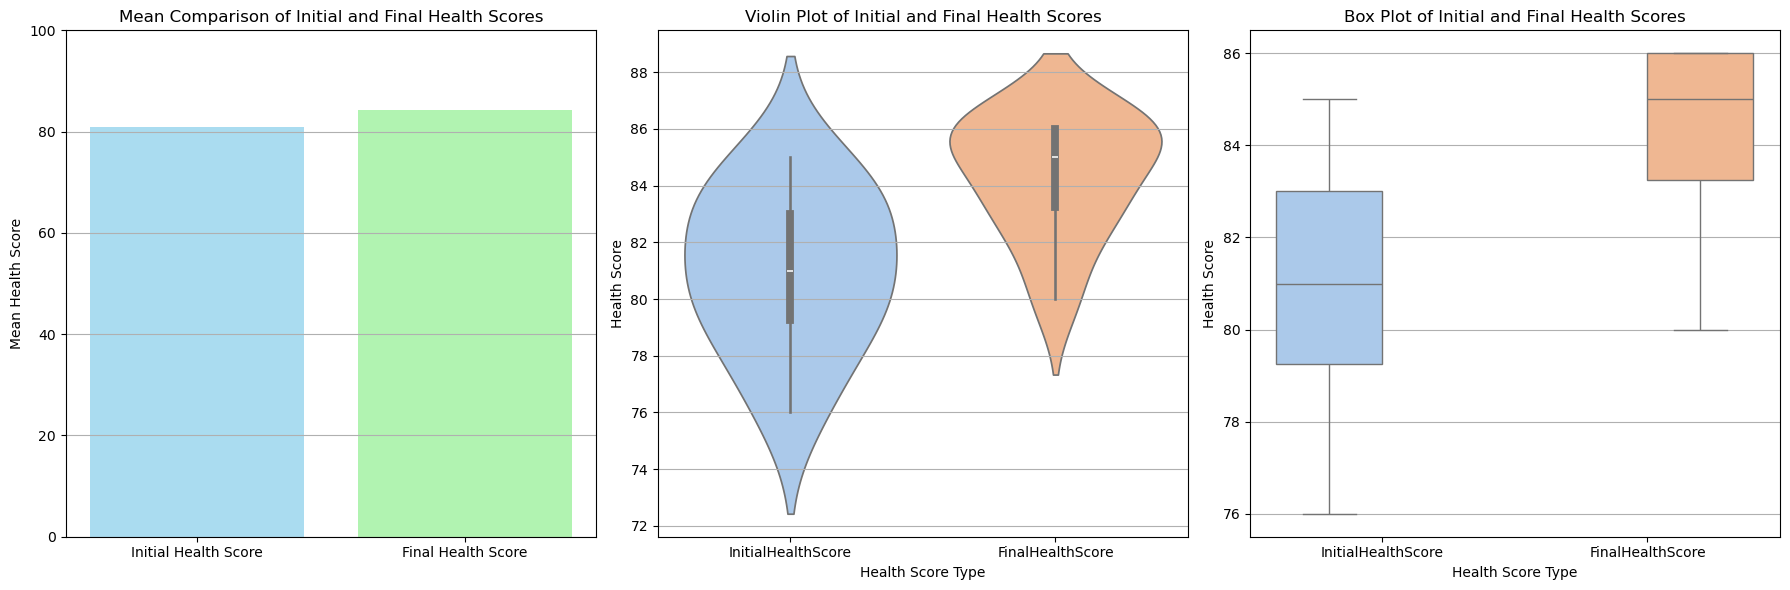

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Bar Plot
means = [df['InitialHealthScore'].mean(), df['FinalHealthScore'].mean()]
categories = ['Initial Health Score', 'Final Health Score']
axs[0].bar(categories, means, color=['skyblue', 'lightgreen'], alpha=0.7)
axs[0].set_ylabel('Mean Health Score')
axs[0].set_title('Mean Comparison of Initial and Final Health Scores')
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y')

# Melt the DataFrame for the violin plot and box plot
df_melted = df.melt(id_vars='PatientID', value_vars=['InitialHealthScore', 'FinalHealthScore'],
                    var_name='Health Score Type', value_name='Health Score')

# Violin Plot
sns.violinplot(x='Health Score Type', y='Health Score', data=df_melted, palette='pastel', ax=axs[1], hue='Health Score Type', legend=False)
axs[1].set_title('Violin Plot of Initial and Final Health Scores')
axs[1].grid(axis='y')

# Box Plot
sns.boxplot(x='Health Score Type', y='Health Score', data=df_melted, palette='pastel', ax=axs[2], hue='Health Score Type', dodge=True, legend=False)
axs[2].set_title('Box Plot of Initial and Final Health Scores')
axs[2].grid(axis='y')

# Show combined plots
fig.tight_layout()
plt.show()


In [ ]:
#Quantitative Analysis
"""
1. Methodology Code and Explanations
In our analysis, I applied bootstrapping to assess the effect of the vaccine on health scores. Bootstrapping is a 
resampling method that allows us to estimate the distribution of a statistic (in this case, the difference in mean 
health scores) by repeatedly sampling from the data.

Steps:
Prepare the Data: Load the initial and final health scores.
 - Set Up Bootstrapping:
    Use np.random.seed(42) for consistent results.
    Set n_iterations (in this case, num_samples) = 1000 to create 1,000 samples.
 - Run Bootstrapping:
    For each sample, randomly pick scores from both initial and final health scores.
    Calculate the difference in means (Final - Initial) and save it in diff_means.
 - Calculate Confidence Intervals: Get the 2.5th and 97.5th percentiles from diff_means to form a 95% confidence interval.

2. Supporting Visualizations
For our visualizations I used 4 visuals from ChatGPT

 - Bar Plot: Shows the average initial and final health scores side by side.
 - Violin Plot: Displays the distribution of health scores before and after vaccination.
 - Box Plot: Provides a clear view of the summary statistics, such as median and quartiles (for initial and final health scores)
 - Bootstrapped Mean Distribution: Illustrates the distribution of means from our bootstrap samples for the final health scores.

"""


Mean of Bootstrapped Samples: 84.32
Standard Deviation of Bootstrapped Samples: 0.64
95% Confidence Interval: (83.00, 85.40)


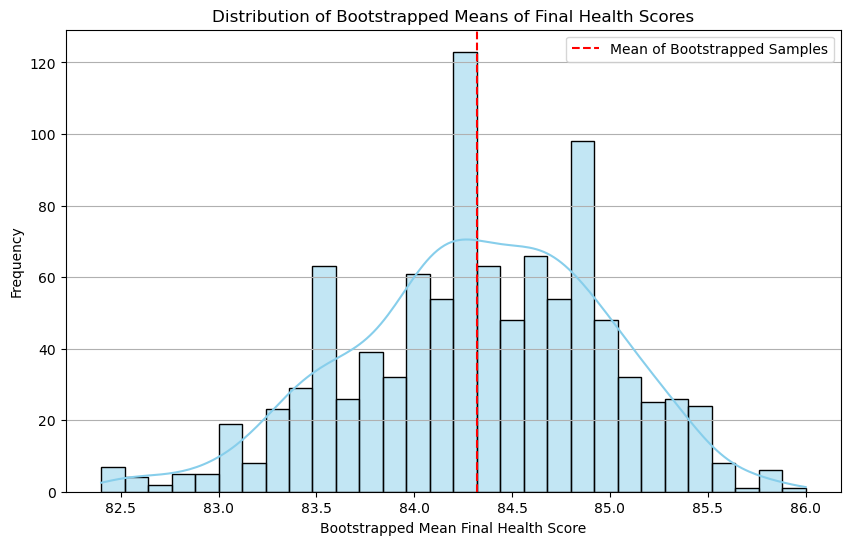

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has already been defined and contains the 'FinalHealthScore' column
final_health_scores = df['FinalHealthScore']

# Set the random seed for reproducibility
np.random.seed(42)

# Function to perform bootstrap sampling and calculate mean
def bootstrap_means(data, num_samples=1000):
    return [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_samples)]

# Bootstrapping the Final Health Scores
bootstrap_results = bootstrap_means(final_health_scores, num_samples=1000)

# Calculate statistics
mean_bootstrap = np.mean(bootstrap_results)
std_bootstrap = np.std(bootstrap_results)
conf_interval = np.percentile(bootstrap_results, [2.5, 97.5])  # 95% CI

# Display statistics
print(f"Mean of Bootstrapped Samples: {mean_bootstrap:.2f}")
print(f"Standard Deviation of Bootstrapped Samples: {std_bootstrap:.2f}")
print(f"95% Confidence Interval: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")

# Visualization 2: Bootstrapped Means of Final Health Scores
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_results, bins=30, kde=True, color='skyblue')
plt.axvline(mean_bootstrap, color='red', linestyle='dashed', linewidth=1.5, label='Mean of Bootstrapped Samples')
plt.xlabel('Bootstrapped Mean Final Health Score')
plt.ylabel('Frequency')
plt.title('Distribution of Bootstrapped Means of Final Health Scores')
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
#Findings and Discussion
"""
1. Findings
There are 3 key points, which are:
- Mean Comparison: The confidence interval is positive from 83.0 (Initial) to 85.40 (Final), it means that there is
  a positive change after vaccination.
  
- Distribution Insights:
   - Violin Plot: Shows that final health scores are more concentrated around higher values.
   - Box Plot: The median final health score (around 85) exceeds the initial score (81). As it has reduced variability, 
     it suggests consistent improvements.
    
- Bootstrapped Means: The histogram of bootstrapped means demonstrates that most values are above zero, with a 
  mean around 84.5.

2. Discussion
  Null Hypothesis
  Our null hypothesis states that there is "no effect" of the vaccine on health scores, implying that any observed 
  differences are due to random chance.

  Analysis Outcome
  The confidence interval from bootstrapping does not include zero (which is from 83.0 to 85.4), suggesting we can 
  reject the null hypothesis. This indicates that there is a significant effect of the vaccine on improving health 
  scores.

  Conclusion
  Overall, the results support the conclusion that the vaccine effectively enhances health scores among patients.

3. Further Considerations
In the future, we should consider:
- Sample Size: The small sample which is 10 patients may limit the accuracy of the results.
- Other Factors: Variables like age and gender could influence outcomes
- Long term Effects: Our analysis focuses on immediate outcomes. In this case, looking for long-term effects and 
  potential side effects is important for better evaluation.

"""

In [ ]:
#To code and visualising I use ChatGPT, this is the summary of my chat session:

"""
Here's a summary of our chat session today:

1. Vaccine Data Analysis Assignment:
   - You provided data related to a new vaccine created by AliTech.
   - We created visualizations, including bar plots, violin plots, and box plots, to compare initial and final health scores.

2. Visualizations:
   - I provided code to create combined visualizations using Matplotlib and Seaborn, including:
     - Bar plot comparing mean health scores.
     - Violin plot showing the distribution of health scores.
     - Box plot illustrating the spread and central tendency of health scores.
   - You requested adjustments, such as using `fig.show(renderer="png")` and ensuring reproducibility with `np.random.seed()`.

3. Bootstrapping:
   - We implemented a bootstrapping technique to calculate the means of health scores and their 95% confidence intervals.
   - I provided code to display the bootstrap statistics alongside the visualizations.

If you need any more assistance or have further questions, feel free to ask!
"""

#Link chat log history:https://chatgpt.com/share/66fefd1d-ad08-8002-a3e2-767969ec40c7

# Instruction 9

Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?


Yes, but not completely. I tried to review and understand the course wiki-textbook.